In [125]:
from torchcore.util import Config
from torchcore.dnn.networks.detectors.build import build_detector
cfg = 'configs/yolox/yolox_s_cspdarknet_pafpn_coco_test.py'
config = Config.fromfile(cfg)
#model=build_detector(config.model)
#model.init_weights()

In [126]:
from torchcore.data.datasets.build import build_dataloader
config.dataloader_train.batch_size=2
train_dataset_loader = build_dataloader(config.dataloader_train,distributed=False)

1021 images are deleted.


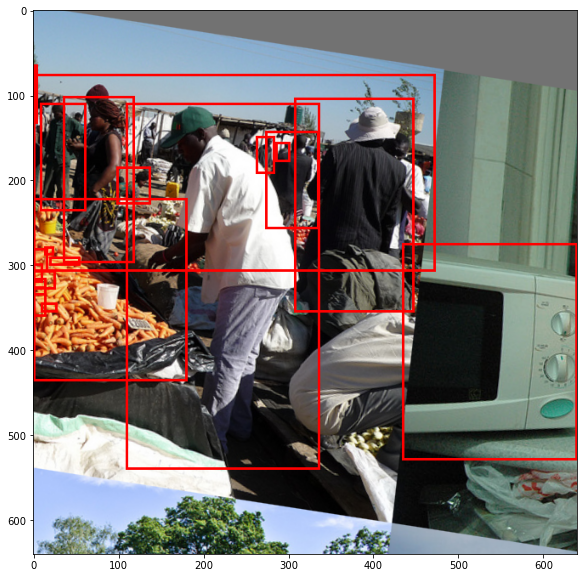

In [225]:
%matplotlib inline
from matplotlib import pyplot as plt
from torchcore.tools.visulize_tools import draw_plain_boxes
i = 0
inputs, targets = train_dataset_loader.dataset[i]
im = inputs['data']
boxes = targets['boxes']
labels = targets['labels']
draw_plain_boxes(im, boxes)
plt.figure(figsize=(10,10))
plt.imshow(im)


In [131]:
from mmdet.datasets import build_dataset,build_dataloader
from mmcv import Config
cfg_path = 'mmconfigs/yolox/yolox_s_8x8_300e_coco_data_test.py'
data_cfg = Config.fromfile(cfg_path)
mm_dataset = build_dataset(data_cfg.data.train)

loading annotations into memory...
Done (t=13.56s)
creating index...
index created!


In [229]:
train_dataset_loader.dataset._transforms[1]

RandomAffine(max_rotate_degree=10.0, max_translate_ratio=0.1, scaling_ratio=(0.1, 2), max_shear_degree=2.0, border=(-320, -320), border_val=(114, 114, 114), min_bbox_size=2, min_area_ratio=0.2, max_aspect_ratio=20, skip_filter=True)

In [233]:
mm_dataset.pipeline[1]

RandomAffine(max_rotate_degree=10.0, max_translate_ratio=0.1, scaling_ratio=(0.1, 2), max_shear_degree=2.0, border=(-320, -320), border_val=(114, 114, 114), min_bbox_size=2, min_area_ratio=0.2, max_aspect_ratio=20)

In [240]:
from mmdet.datasets.pipelines import RandomAffine
import numpy as np

center_matrix = np.eye(3, dtype=np.float32)
center_matrix[0, 2] = -1280 / 2  # x translation (pixels)
center_matrix[1, 2] = -1280 / 2  # y translation (pixels)

# Rotation
rotation_degree = 5
rotation_matrix = RandomAffine._get_rotation_matrix(rotation_degree)

# Scaling
scaling_ratio = 1.2
scaling_matrix = RandomAffine._get_scaling_matrix(scaling_ratio)

# Shear
x_degree = 1.1
y_degree = -1.1
shear_matrix = RandomAffine._get_shear_matrix(x_degree, y_degree)

# Translation
trans_x = 640
trans_y = 640
translate_matrix = RandomAffine._get_translation_matrix(trans_x, trans_y)

warp_matrix1 = (
    translate_matrix @ shear_matrix @ rotation_matrix @ scaling_matrix
    @ center_matrix)

In [1]:
import torch
from torchcore.util import Config
from torchcore.dnn.networks.detectors.build import build_detector
from torchcore.dnn.optimizer.build import build_optimizer, build_lr_scheduler
cfg = 'configs/yolox/yolox_s_cspdarknet_pafpn_coco.py'
config = Config.fromfile(cfg)
model=build_detector(config.model)
#model.init_weights()
checkpoint_path='/home/dsv/qida0163/Vision/data/yolox/yolox_s_cspdarknet_pafpn_coco_20220329/checkpoints/checkpoint_20220329_last.pth'
checkpoint = torch.load(checkpoint_path, map_location='cpu')
op_dict = checkpoint['optimizer_state_dict']
config.trainer.optimizer.lr = 0.005
optimizer = build_optimizer(model, config.trainer.optimizer)

scheduler = build_lr_scheduler(optimizer, config.trainer.scheduler)
state_dict=checkpoint['scheduler']
new_lr = 0.005


assert 'base_lrs' in state_dict
if isinstance(new_lr, float):
    new_lr = [new_lr for _ in state_dict['base_lrs']]
for g, lr in zip(op_dict['param_groups'],new_lr):
    assert 'initial_lr' in g
    g['initial_lr'] = lr
#for g, lr in zip(scheduler.saved_vars['optimizer'].param_groups,new_lr):
#    assert 'initial_lr' in g
#    g['initial_lr'] = lr
#state_dict['saved_vars']['last_epoch'] = state_dict['last_epoch']
optimizer.load_state_dict(op_dict)
#state_dict['base_lrs'] = new_lr
scheduler.load_state_dict(state_dict)
#print(scheduler.saved_vars.keys())
#print(scheduler.saved_vars['optimizer'])
#print(scheduler.saved_vars['optimizer'].param_groups[0]['initial_lr'])
scheduler.update_iter_per_epoch(3665)

0.01


/data0/home/dsv/qida0163/Vision/git/fashion_detection/torchcore/dnn/optimizer/lr_scheduler.py:223: UserWarning: the iter_per_epoch has been updated, please check if this is your intended action
  warnings.warn('the iter_per_epoch has been updated, please check if this is your intended action')


In [12]:
op_dict['state'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [5]:
optimizer.step()
#optimizer.zero_grad()
scheduler.step_iter(cur_epoch=286,cur_iter=223011)

In [4]:
scheduler.get_last_lr()

[0.00025, 0.00025]

In [8]:
scheduler.base_lrs

[0.005, 0.005]

In [10]:
checkpoint['optimizer_state_dict']['param_groups']

[{'weight_decay': 0.0,
  'lr': 0.0005002989804151723,
  'momentum': 0.9,
  'dampening': 0,
  'nesterov': True,
  'initial_lr': 0.005,
  'params': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120

In [29]:
scheduler.cur_epoch = 286
scheduler.cur_iter = 579212
scheduler.get_lr()

[0.0005, 0.0005]

In [9]:
state_dict

{'saved_vars': {'optimizer': SGD (
  Parameter Group 0
      dampening: 0
      initial_lr: 0.01
      lr: 0.0005
      momentum: 0.9
      nesterov: True
      weight_decay: 0.0
  
  Parameter Group 1
      dampening: 0
      initial_lr: 0.01
      lr: 0.0005
      momentum: 0.9
      nesterov: True
      weight_decay: 0.0005
  ),
  'iter_per_epoch': None,
  'num_last_epochs': 15,
  'max_epoch': 300,
  'min_lr_ratio': 0.05,
  'warmup': True,
  'warmup_iter': 0,
  'warmup_factor': 1,
  'warmup_method': 'exp',
  'warmup_by_epoch': False,
  'update_method': 'iter',
  'warmup_epoch': 5,
  'last_epoch': -1,
  '__class__': torchcore.dnn.optimizer.lr_scheduler.YOLOXScheduler},
 'has_update_iter_per_epoch': True,
 'num_last_epochs': 15,
 'iter_per_epoch': 3665,
 'warmup_epoch': 5,
 'max_epoch': 300,
 'no_change_epoch': 285,
 'min_lr_ratio': 0.05,
 'cos_total_iter': 1026200,
 'warmup': True,
 'warmup_method': 'exp',
 'warmup_factor': 1,
 'warmup_by_epoch': False,
 'update_method': 'iter',
 'wa

In [6]:
checkpoint['optimizer_state_dict']['param_groups']

[{'weight_decay': 0.0,
  'lr': 0.0005002989804151723,
  'momentum': 0.9,
  'dampening': 0,
  'nesterov': True,
  'initial_lr': 0.01,
  'params': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,

In [241]:
warp_matrix1

array([[ 1.1974418e+00, -8.1633404e-02, -7.4117432e+01],
       [ 8.1633404e-02,  1.1974418e+00, -1.7860815e+02],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]], dtype=float32)

In [242]:


# Translation
trans_x = 0
trans_y = 0
translate_matrix2 = RandomAffine._get_translation_matrix(trans_x, trans_y)

warp_matrix2 = (
    translate_matrix2 @ shear_matrix @ rotation_matrix @ scaling_matrix)

In [244]:
warp_matrix2-warp_matrix1

array([[  0.     ,   0.     ,  74.11743],
       [  0.     ,   0.     , 178.60815],
       [  0.     ,   0.     ,   0.     ]], dtype=float32)

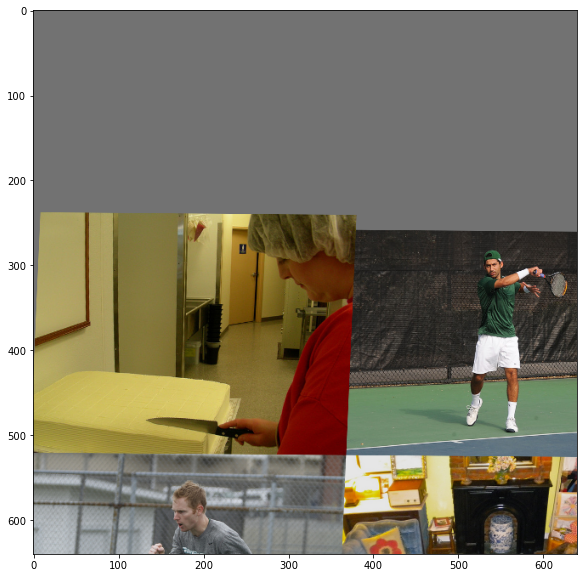

In [228]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
im = mm_dataset[1]['img']
im = im.astype(np.uint8)
im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(im)

In [5]:
from torch.nn import GroupNorm, LayerNorm
from torch.nn.modules.batchnorm import _BatchNorm
from torch.nn.modules.instancenorm import _InstanceNorm
def is_norm(module):  
    return isinstance(module,(_BatchNorm, _InstanceNorm, GroupNorm, LayerNorm))

In [ ]:
for name, p, in model.named_parameters():
    print(name)
    print(p.shape)
    print(is_norm(p))
    

In [29]:
from torchcore.dnn.optimizer import build_optimizer
optimizer_cfg = dict(
    type='SGD',
    lr=0.01,
    momentum=0.9,
    weight_decay=5e-4,
    nesterov=True,
    param_cfg=dict(norm_weight_decay=0.))
op = build_optimizer(model, optimizer_cfg)

148


In [1]:
from torchcore.dnn.networks.toy_model import ToyModel
tmodel = ToyModel()


In [26]:
from torchcore.dnn.optimizer import build_optimizer, build_lr_scheduler
from easydict import EasyDict as edict
optimizer_cfg = dict(
    type='SGD',
    lr=0.01,
    momentum=0.9,
    weight_decay=5e-4,
    nesterov=True,
)
op = build_optimizer(tmodel, optimizer_cfg)
print(op.param_groups[0]['lr'])
#scheduler = edict(
#        type = 'WarmupMultiStepLR',
#        milestones = [800, 1100], # infer from linear lr
#        gamma=0.1,
#        warmup_factor=1.0 / 3,
#        warmup_iters=5,
#        warmup_method="linear",
#    )
#scheduler = edict(
#    type='WarmupLRScheduler',
#    update_method='epoch',
#    warmup=True,
#    warmup_iter=10,
#    warmup_factor = 1/3.,
#    warmup_method='exp',
#    warmup_by_epoch=True,
#)
scheduler = edict(
    type='CosineAnnealingScheduler', 
    min_lr=None,
    min_lr_ratio=0.05,
    update_method='epoch', 
    warmup=True, 
    warmup_iter=5, 
    warmup_factor=1 / 3, 
    warmup_by_epoch=True, 
    warmup_method='exp',
    max_iter=None,
    max_epoch=15,
)
lr_s = build_lr_scheduler(op, scheduler)
print(op.param_groups[0]['lr'])

0.01
0.00013333333333333337


In [ ]:
import torch
for i in range(15):
    loss = tmodel(torch.randn((1,3,6,6)))
    loss.backward()
    op.step()
    print(i, lr_s.get_last_lr())
    lr_s.update_epoch(cur_epoch=i+1)

In [52]:
import torch
for i in range(10):
    loss = tmodel(torch.randn((1,3,7,7)))
    print('Step {}: lr in is {}'.format(i, lr_s.get_last_lr()))
    print(op.param_groups[0]['lr'])
    loss.backward()
    op.step()
    lr_s.step()
    print('Step {}: lr in is {}'.format(i, lr_s.get_last_lr()))
    print()

Step 0: lr in is [0.003333333333333333]
0.003333333333333333
get lr at epoch 1
Step 0: lr in is [0.004666666666666667]

Step 1: lr in is [0.004666666666666667]
0.004666666666666667
get lr at epoch 2
Step 1: lr in is [0.006]

Step 2: lr in is [0.006]
0.006
get lr at epoch 3
Step 2: lr in is [0.007333333333333333]

Step 3: lr in is [0.007333333333333333]
0.007333333333333333
get lr at epoch 4
Step 3: lr in is [0.008666666666666668]

Step 4: lr in is [0.008666666666666668]
0.008666666666666668
get lr at epoch 5
Step 4: lr in is [0.01]

Step 5: lr in is [0.01]
0.01
get lr at epoch 6
Step 5: lr in is [0.01]

Step 6: lr in is [0.01]
0.01
get lr at epoch 7
Step 6: lr in is [0.01]

Step 7: lr in is [0.01]
0.01
get lr at epoch 8
Step 7: lr in is [0.01]

Step 8: lr in is [0.01]
0.01
get lr at epoch 9
Step 8: lr in is [0.01]

Step 9: lr in is [0.01]
0.01
get lr at epoch 10
Step 9: lr in is [0.01]



In [4]:
from torchcore.dnn.networks.tools.load_from_mmdetection import load_mm_general_model
#checkpoint= 'yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth'
checkpoint=None
mm_config = 'mmconfigs/yolox/yolox_s_8x8_300e_coco_old.py'
mm_model=load_mm_general_model( model, mm_config=mm_config, checkpoint_file=checkpoint, return_mm_model=True)

2022-03-21 11:47:47,264 - mmcv - INFO - initialize CSPDarknet with init_cfg {'type': 'Kaiming', 'layer': 'Conv2d', 'a': 2.23606797749979, 'distribution': 'uniform', 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}
2022-03-21 11:47:47,295 - mmcv - INFO - initialize YOLOXPAFPN with init_cfg {'type': 'Kaiming', 'layer': 'Conv2d', 'a': 2.23606797749979, 'distribution': 'uniform', 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}
2022-03-21 11:47:47,313 - mmcv - INFO - initialize YOLOXHead with init_cfg {'type': 'Kaiming', 'layer': 'Conv2d', 'a': 2.23606797749979, 'distribution': 'uniform', 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}
2022-03-21 11:47:47,322 - mmcv - INFO - 
backbone.stem.conv.conv.weight - torch.Size([32, 12, 3, 3]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-03-21 11:47:47,322 - mmcv - INFO - 
backbone.stem.conv.bn.weight - torch.Size([32]): 
The value is the same before and after calling `init_weights` of

In [5]:
from torchcore.data.datasets.build import build_dataloader
from torchcore.util.config import Config
#cfg_path = 'configs/fcos/fcos_resnet50_fpn_coco.py'
cfg_path = 'configs/base/datasets/coco_frcnn_test.py'
cfg = Config.fromfile(cfg_path)
cfg.dataloader_val.batch_size=1
val_dataset_loader = build_dataloader(cfg.dataloader_val,distributed=False)

48 images are deleted.


In [9]:
from torchcore.data.util import set_device
device1='cpu'
device2='cpu'
#device1=0
#device2=1

model=model.to(device1)
mm_model=mm_model.to(device2)
model.train()
mm_model.train()

for i, (inputs, targets) in enumerate(val_dataset_loader):
    #results = model(inputs, targets)
    inputs1 = set_device(inputs, device1)
    targets1 = set_device(targets,device1)
    loss = model(inputs1, targets1)
    inputs2 = set_device(inputs, device2)
    targets2 = set_device(targets,device2)
    img_meta = [{'img_shape':imsize,'scale_factor':imscale,'flip':False} for imsize,imscale in zip(inputs2['image_sizes'],inputs2['image_sizes'])]
    for meta in img_meta:
        meta['pad_shape'] = (inputs2['data'].shape[2],inputs2['data'].shape[3],inputs1['data'].shape[1])
    gt_boxes = [t['boxes'] for t in targets2]
    gt_labels = [t['labels']-1 for t in targets2]
    #the losses of five layers
    mm_loss=mm_model(inputs2['data'],img_meta,gt_bboxes=gt_boxes,gt_labels=gt_labels)
    
    loss_sum = sum(loss.values())
    mm_loss_sum = sum(mm_loss.values())
    min_num = 1e-6
    if abs(loss['class_loss'].item()-mm_loss['loss_cls'].item()) > min_num or abs(loss['box_loss'].item() -mm_loss['loss_bbox'].item()) > min_num or abs(loss['obj_loss'].item()-mm_loss['loss_obj'].item()) > min_num:
        print('{} my obj: {}, bbox: {}'.format(i, loss['class_loss'],loss['box_loss']))
        print('{} mm obj: {}, bbox: {}'.format(i, mm_loss['loss_cls'],mm_loss['loss_bbox']))
        print(loss)
        print(mm_loss)
        print()

    #loss_sum.backward()
    #mm_loss_sum.backward()

    if i>1:
        break

0 my obj: 1.865319848060608, bbox: 4.706445217132568
0 mm obj: 2.7836923599243164, bbox: 4.682084560394287
{'loss_cls': tensor(2.7837, grad_fn=<DivBackward0>), 'loss_bbox': tensor(4.6821, grad_fn=<DivBackward0>), 'loss_obj': tensor(21.8771, grad_fn=<DivBackward0>)}

1 my obj: 1.3605297803878784, bbox: 4.886672496795654
1 mm obj: 2.294034957885742, bbox: 4.662125587463379
{'loss_cls': tensor(2.2940, grad_fn=<DivBackward0>), 'loss_bbox': tensor(4.6621, grad_fn=<DivBackward0>), 'loss_obj': tensor(10.4233, grad_fn=<DivBackward0>)}

2 my obj: 0.9842612743377686, bbox: 4.98605489730835
2 mm obj: 0.9841485023498535, bbox: 4.988593578338623
{'loss_cls': tensor(0.9841, grad_fn=<DivBackward0>), 'loss_bbox': tensor(4.9886, grad_fn=<DivBackward0>), 'loss_obj': tensor(34.7232, grad_fn=<DivBackward0>)}



In [38]:

from torchcore.data.util import set_device
device1='cpu'
device2='cpu'
#device1=0
#device2=1

model=model.to(device1)
mm_model=mm_model.to(device2)
model.eval()
mm_model.eval()

for i, (inputs, targets) in enumerate(val_dataset_loader):
    #results = model(inputs, targets)
    inputs1 = set_device(inputs, device1)
    targets1 = set_device(targets,device1)
    result = model(inputs1, targets=None)
    inputs2 = set_device(inputs, device2)
    targets2 = set_device(targets,device2)
    img_meta = [{'img_shape':imsize,'scale_factor':imscale,'flip':False} for imsize,imscale in zip(inputs2['image_sizes'],inputs2['image_sizes'])]
    for meta in img_meta:
        meta['pad_shape'] = (inputs2['data'].shape[2],inputs2['data'].shape[3],inputs1['data'].shape[1])
    gt_boxes = [t['boxes'] for t in targets2]
    gt_labels = [t['labels']-1 for t in targets2]
    #the losses of five layers
    mm_result=mm_model([inputs2['data']],[img_meta],return_loss=False)
    if i==1:
        break
    


In [35]:
mm_result

[[array([[2.7238464e-01, 3.7875464e+02, 1.3048331e+02, 7.7400415e+02,
          1.5468514e-02]], dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([[6.5693372e+02, 2.5502541e+02, 7.37041

In [39]:
result

{'boxes': [tensor([[3.5066e+02, 1.3612e+02, 3.9342e+02, 1.7711e+02],
          [1.4539e-01, 2.0216e+02, 6.9649e+01, 4.1312e+02]],
         grad_fn=<CopySlices>)],
 'scores': [tensor([0.0202, 0.0155], grad_fn=<IndexBackward>)],
 'labels': [tensor([22,  1])]}

In [2]:
from mmdet.models import CSPDarknet, YOLOXPAFPN, YOLOXHead,YOLOX
import torch
from easydict import EasyDict as edict
in_channels = (256, 512, 1024)
out_channels = 256
train_cfg = edict(assigner=edict(
                            type='SimOTAAssigner', center_radius=2.5))
test_cfg=edict(
    score_thr=0.01, 
    nms=edict(
        type='nms', 
        iou_threshold=0.65)
    )
mm_backbone = CSPDarknet(arch='P5')
mm_neck = YOLOXPAFPN(in_channels, out_channels)
mm_head = YOLOXHead(80, 
                    256, 
                    256,
                    train_cfg=train_cfg,
                        
    # In order to align the source code, the threshold of the val phase is
    # 0.01, and the threshold of the test phase is 0.001.
                    test_cfg=test_cfg
                    )

In [14]:
mm_priors=mm_head.prior_generator.grid_priors(featmap_sizes=[torch.Size([32, 32]), torch.Size([16, 16]), torch.Size([8, 8])],device='cpu')

In [35]:
from torchcore.dnn.networks.tools.anchor.grid_point_generator import MultiLevelGridPointGenerator
import torch
prior_gen = MultiLevelGridPointGenerator(strides=[8,16,32],offset=0)
priors =  prior_gen.multi_level_grid([torch.Size([32, 32]), torch.Size([16, 16]), torch.Size([8, 8])], with_strides=True)

In [8]:
for i, (inputs, targets) in enumerate(val_dataset_loader):
    if i==2:
        break

In [8]:
from torchcore.dnn.networks.tools.box_matcher.sim_ota_matcher import SimOTABoxMatcher
matcer = SimOTABoxMatcher()

In [4]:
import torch
from torchcore.dnn.networks.backbone.csp_darknet import Focus, CSPDarknet
from torchcore.dnn.networks.necks.yolox_pafpn import YOLOXPAFPN
from torchcore.dnn.networks.heads.yolox_head import YOLOXFeatureHead
from torchcore.dnn.networks.detection_heads.yolox_head import YOLOXHead
backbone = CSPDarknet(deepen_factor=1, widen_factor=1)
backbone.init_weights()
neck = YOLOXPAFPN(in_channels,out_channels)
feature_head = YOLOXFeatureHead(80, 256)
head = YOLOXHead()
#data = torch.randn((2,3,256,256))
#out=backbone(data)

#backbone.print_info(print_statistics=True)

In [5]:
with torch.no_grad():
    for (n,p),(mn,mp) in zip(backbone.named_parameters(),mm_backbone.named_parameters()):
        p.copy_(mp)
        if p.shape !=mp.shape:
            print(n, mn)
    for (n,p),(mn,mp) in zip(neck.named_parameters(),mm_neck.named_parameters()):
        if p.shape != mp.shape:
            print(n, mn)
        p.copy_(mp)
        if p.shape !=mp.shape:
            print(n, mn)
    for (n,p),(mn,mp) in zip(feature_head.named_parameters(),mm_head.named_parameters()):
        if p.shape != mp.shape:
            print(n, mn)
        p.copy_(mp)
        if p.shape !=mp.shape:
            print(n, mn)
    for (n,p),(mn,mp) in zip(head.head.named_parameters(),mm_head.named_parameters()):
        if p.shape != mp.shape:
            print(n, mn)
        p.copy_(mp)
        if p.shape !=mp.shape:
            print(n, mn)

In [6]:
import torch
data = inputs['data']
data1 = data.clone()
mm_out = mm_backbone(data)
mm_out = mm_neck(mm_out)
mm_out = mm_head(mm_out)
out = backbone(data1)
out_neck = neck(out)
out = feature_head(out_neck)
#out = head(inputs,out_neck,targets)

In [13]:
for i in range(3):
    for j in range(3):
        print((mm_out[i][j]-out[j][i]).max())
        

tensor(5.8292, grad_fn=<MaxBackward1>)
tensor(4.9801, grad_fn=<MaxBackward1>)
tensor(4.4127, grad_fn=<MaxBackward1>)
tensor(4.7620, grad_fn=<MaxBackward1>)
tensor(2.0329, grad_fn=<MaxBackward1>)
tensor(1.9844, grad_fn=<MaxBackward1>)
tensor(6.2942, grad_fn=<MaxBackward1>)
tensor(4.0496, grad_fn=<MaxBackward1>)
tensor(3.2691, grad_fn=<MaxBackward1>)


In [9]:
losses= head(inputs,out_neck,targets)

In [7]:
head.eval()
result = head(inputs,out_neck,targets)

In [10]:
from torchcore.data.datasets.convert_my_input_to_mmdet import convert_to_mmdet
img_meta, gt_boxes,gt_labels = convert_to_mmdet(inputs, targets)
mm_head.use_l1=True
mm_loss = mm_head.loss(*mm_out, gt_bboxes=gt_boxes,gt_labels=gt_labels,img_metas=img_meta)

In [11]:
print(mm_loss['loss_cls'] - losses['class_loss'])
print(mm_loss['loss_bbox'] - losses['box_loss'])
print(mm_loss['loss_obj'] - losses['obj_loss'])
print(mm_loss['loss_l1'] - losses['l1_loss'])

tensor(0., grad_fn=<SubBackward0>)
tensor(0., grad_fn=<SubBackward0>)
tensor(0., grad_fn=<SubBackward0>)
tensor(0., grad_fn=<SubBackward0>)


In [136]:
prior_with_strides = head.get_priors_with_strides(out)
# output shape: Nxall_anchor_numxC
pred_cls, pred_box, pred_obj, decode_boxes = head.cat_multi_level_pred(out, prior_with_strides)
offset_priors_with_strides = torch.cat([prior_with_strides[:,:2]+0.5*prior_with_strides[:,2:], prior_with_strides[:,2:]], dim=-1)



In [137]:
match = head.box_matcher.match(pred_cls[1].sigmoid()*pred_obj[1].sigmoid().unsqueeze(-1), offset_priors_with_strides, decode_boxes[1], gt_boxes[1], gt_labels[1] )

In [138]:
mm_match = mm_head.assigner.assign(pred_cls[1].sigmoid()*pred_obj[1].sigmoid().unsqueeze(-1), offset_priors_with_strides, decode_boxes[1], gt_boxes[1], gt_labels[1])

In [133]:
mm_ind, _ =mm_head.assigner.get_in_gt_and_in_center_info(offset_priors_with_strides,gt_boxes[1])

In [141]:
(match.matched_ind+1==mm_match.gt_inds).all()

tensor(True)

In [113]:
for i in range(2):
    print(i)
    print((pos_ind_all[i]==pos_masks[i]).all())
    print((cls_targets_all[i]==cls_targets[i]).all())
    print((box_targets_all[i]==bbox_targets[i]).all())
    print((obj_targets_all[i]==obj_targets[i]).all())
    print((l1_targets_all[i]==l1_targets[i]).all())

0
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
1
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)


In [88]:
print((pred_box-flatten_bbox_preds==0).all())
print((pred_cls-flatten_cls_preds==0).all())
print((pred_obj-flatten_objectness==0).all())

tensor(True)
tensor(True)
tensor(True)


In [163]:
mm_loss

{'loss_cls': tensor(65.5122, grad_fn=<DivBackward0>),
 'loss_bbox': tensor(4.8822, grad_fn=<DivBackward0>),
 'loss_obj': tensor(769.3091, grad_fn=<DivBackward0>),
 'loss_l1': tensor(4.6983, grad_fn=<DivBackward0>)}

In [161]:
losses

{'class_loss': tensor(65.5122, grad_fn=<DivBackward0>),
 'box_loss': tensor(4.8822, grad_fn=<DivBackward0>),
 'obj_loss': tensor(769.3091, grad_fn=<DivBackward0>),
 'l1_loss': tensor(4.6983, grad_fn=<DivBackward0>)}

In [26]:
mm_pos_num

35

In [15]:
mm_losses

{'loss_cls': tensor(65.5122, grad_fn=<DivBackward0>),
 'loss_bbox': tensor(4.8822, grad_fn=<DivBackward0>),
 'loss_obj': tensor(769.3091, grad_fn=<DivBackward0>),
 'loss_l1': tensor(4.6983, grad_fn=<DivBackward0>)}

In [11]:
losses

{'class_loss': tensor(68.1473, grad_fn=<DivBackward0>),
 'box_loss': tensor(5., grad_fn=<DivBackward0>),
 'obj_loss': tensor(556.7839, grad_fn=<DivBackward0>),
 'l1_loss': tensor(4.9101, grad_fn=<DivBackward0>)}

In [21]:
(foreground_mask, mm_cls_target, mm_obj_target, mm_bbox_target,
                mm_l1_target, num_pos_per_img)=mm_head._get_target_single(cls_preds=pred_cls,objectness=pred_obj,priors=prior_with_strides,decoded_bboxes=decode_boxes,gt_bboxes=gt_boxes,gt_labels=gt_labels)

AttributeError: 'YOLOXHead' object has no attribute 'assigner'

In [13]:
box_targets


tensor([[ 864.3259,  547.8122,  888.2521,  563.6807],
        [ 961.3629,  552.2441, 1001.1085,  562.7042],
        [ 816.9615,  552.5446,  842.2200,  567.2112],
        [ 839.6491,  551.9437,  862.4681,  566.3098],
        [ 115.6150,   82.1784,  202.4623,  229.2019],
        [ 447.6352,  297.6150,  562.4058,  401.6338],
        [ 470.6794,  315.9812,  602.2452,  437.8216],
        [ 763.8923,  539.4366,  787.6308,  557.9530],
        [1159.8282,  543.3051, 1181.5963,  558.2347],
        [ 535.8524,  695.8873,  558.5025,  731.9624]])

In [118]:
match1.gt_inds

tensor([0, 0, 0,  ..., 0, 0, 0])

In [130]:
(match.matched_ind+1 == match1.gt_inds).all()
(match.labels == match1.labels).all()
(match.max_iou == match1.max_overlaps).all()

tensor(True)

In [127]:
match1.max_overlaps

tensor([-100000000., -100000000., -100000000.,  ..., -100000000.,
        -100000000., -100000000.])

In [126]:
match.max_iou

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [88]:
import torch
torch.log(torch.tensor(1e-7))

tensor(-16.1181)

(1201, 800)


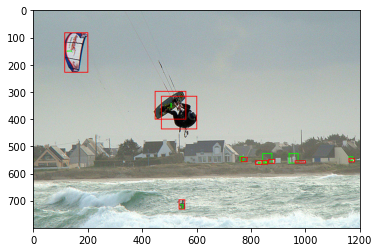

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchcore.tools.visulize_tools import draw_boxes, draw_plain_boxes
im = val_dataset_loader.dataset[0][0]['data']
imsize=  im.size
scale = 800/min(imsize)
new_size = (int(imsize[0]*scale), int(imsize[1]*scale))
im = im.resize(new_size)
print(new_size)
draw_plain_boxes(im, matched_boxes.detach().cpu().numpy(),color=(0,255,0))
#draw_plain_boxes(im, test,color=(0,255,0))
draw_plain_boxes(im, gt_boxes)
plt.imshow(im)

In [24]:
min(im.size)

426

In [11]:
[o[0].shape[-2:] for o in out]

[torch.Size([32, 32]), torch.Size([16, 16]), torch.Size([8, 8])]

In [6]:
(mm_out[2]-out[5]).min()

tensor(0., grad_fn=<MinBackward1>)

In [15]:
from torchcore.dnn.networks.backbone.csp_darknet import Focus, CSPDarknet
foc = Focus(1,3,3)
model = CSPDarknet()
data = torch.tensor([11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44]).reshape((1,1,4,4)).float()
print(data.shape)
foc(data)

torch.Size([1, 1, 4, 4])
tensor([[[[11., 13.],
          [31., 33.]],

         [[21., 23.],
          [41., 43.]],

         [[12., 14.],
          [32., 34.]],

         [[22., 24.],
          [42., 44.]]]])


tensor([[[[ 1.5278, -0.9014],
          [ 0.2600, -0.8864]],

         [[-0.1907, -1.5215],
          [ 0.5535,  1.1586]],

         [[-1.6653,  0.9977],
          [ 0.2678,  0.3998]]]], grad_fn=<NativeBatchNormBackward>)